In [1]:
#IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from dataUtils import *
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.spatial.transform import Rotation as R

import dataUtils as du

import os 

In [2]:
def get_mean_std(path,idx=499):
  losses = np.load(path)
  mean = np.mean(losses[:,idx])
  std = np.std(losses[:,idx])
  return mean, std

In [3]:
cur_fold = os.getcwd()
#print(cur_fold)

model_files = os.listdir(cur_fold + "/data/20_new")
train_files = []
for f in model_files:
  if "trainloss" in f:
    train_files.append(f)
print(train_files)

for f in train_files:
  if "_64_" in f:
    print(f)


['2hid_16_neu_1000epoch_p001lr_nonorm_trainloss.npy', '2hid_16_neu_500epoch_p001lr_marker_2norm_nonplanar_trainloss.npy', '2hid_16_neu_500epoch_p001lr_marker_nonorm_nonplanar_trainloss.npy', '2hid_16_neu_500epoch_p001lr_marker_split_nonorm_nonplanar_trainloss.npy', '2hid_16_neu_500epoch_p001lr_marker_split_norm_nonplanar_trainloss.npy', '2hid_16_neu_500epoch_p001lr_norm-11_trainloss.npy', '2hid_32_neu_1000epoch_p001lr_nonorm_trainloss.npy', '2hid_32_neu_500epoch_p001lr_marker_2norm_nonplanar_trainloss.npy', '2hid_32_neu_500epoch_p001lr_marker_nonorm_nonplanar_trainloss.npy', '2hid_32_neu_500epoch_p001lr_marker_norm_individual_trainloss.npy', '2hid_32_neu_500epoch_p001lr_marker_split_nonorm_nonplanar_trainloss.npy', '2hid_32_neu_500epoch_p001lr_marker_split_norm_nonplanar_trainloss.npy', '2hid_32_neu_500epoch_p001lr_norm-11_trainloss.npy', '3hid_16_neu_1000epoch_p001lr_nonorm_trainloss.npy', '3hid_16_neu_500epoch_p001lr_marker_2norm_nonplanar_trainloss.npy', '3hid_16_neu_500epoch_p001lr

# Note that all models are named with 1 too many hidden layers, so 3H = 2H og 2H = 1H (we initially also counted the input layer)

In [4]:
#models loss
#types = ["2hid_16_neu_","2hid_32_neu_","3hid_16_neu_","3hid_32_neu_"]

basic_models = ["nonorm","norm-11_"] 
marker_models = ["nonorm","2norm"]
split_models = ["nonorm","_norm"]

model_types = {
    "2hid_16_neu_" : [],
    "2hid_32_neu_" : [],
    "3hid_16_neu_" : [],
    "3hid_32_neu_" : [],
    "3hid_64_neu_" : []
}

def model_path(model_path,model_name,folder = "data/20_new/"):
    path = folder + model_path

    train_mean,train_std = get_mean_std(path+"_trainloss.npy")
    val_mean, val_std = get_mean_std(path+"_valloss.npy")
    
    return [val_mean,val_std,train_mean,train_std,model_name]

for t in model_types:
    basics = []
    splits = []
    markers = []
    for k in train_files:
        if t in k:
            if "marker_split" in k:
                for m in split_models:
                    if m in k:
                        splits.append(model_path(k[:-14],k))#"marker_split_"+m))
            elif "marker" in k:
                for m in marker_models:
                    if m in k:
                        markers.append(model_path(k[:-14],k))#"marker_"+m))
            else:
                for m in basic_models:
                    if m in k:
                        basics.append(model_path(k[:-14],k))#"basic_"+m))

    model_types[t] = [basics[0],basics[1],markers[1],markers[0],splits[0],splits[1]]



for t in model_types:
    #if t == "3hid_32_neu_":
    print("#######################", len(model_types[t]))#, len(model_types[t][0]),len(model_types[t][1]),len(model_types[t][2]))
    for m in model_types[t]:
        #print("##")
        print(m)
        #for v in m:
        #    print(t,v)

####################### 6
[7.704523673749739, 1.3181360432248077, 5.882017648604608, 0.5487810469876495, '2hid_16_neu_1000epoch_p001lr_nonorm_trainloss.npy']
[8.514593856949961, 1.0266950700850634, 7.906080159448808, 0.7077255976076904, '2hid_16_neu_500epoch_p001lr_norm-11_trainloss.npy']
[52.33710504962552, 10.496507679214766, 44.706311782713854, 8.988314566338829, '2hid_16_neu_500epoch_p001lr_marker_nonorm_nonplanar_trainloss.npy']
[17.54388240883427, 0.9232963496837123, 16.341511579290515, 2.030090384379656, '2hid_16_neu_500epoch_p001lr_marker_2norm_nonplanar_trainloss.npy']
[10.265802020411337, 1.3719129571330166, 9.752119156910528, 0.8775271863316092, '2hid_16_neu_500epoch_p001lr_marker_split_nonorm_nonplanar_trainloss.npy']
[14.88427949182449, 3.3739981447866727, 14.089776764089061, 2.4615001030358985, '2hid_16_neu_500epoch_p001lr_marker_split_norm_nonplanar_trainloss.npy']
####################### 6
[7.767483056745222, 1.043763377897822, 3.988466404090005, 0.5226635685039211, '2h

len x 6 (6,) [ 0  4  8 12 16 20]
0
[52.962, 7.704523673749739, 7.767483056745222, 8.293795417201135, 8.30341117401277, 9.76260765329484]
[1.833, 1.3181360432248077, 1.043763377897822, 1.0985846003431772, 1.4044969278277653, 1.2855234295782376]
1
[52.962, 8.514593856949961, 6.9738296281906855, 8.18571047782898, 6.648730764465948, 7.126145967360465]
[1.833, 1.0266950700850634, 1.0088899789274581, 1.0453690337252575, 1.9456891822554525, 1.6260299451835392]
2
[91.867, 52.33710504962552, 20.180165503101968, 38.248070673788746, 24.379323485589797, 21.138847377223353]
[3.102, 10.496507679214766, 1.450669066152598, 12.208671421496481, 5.232510810453547, 0.7749957856480397]
3
[91.867, 17.54388240883427, 11.636419239351827, 28.188129546565392, 10.930530365051762, 9.4693796592374]
[3.102, 0.9232963496837123, 1.5034589209483522, 25.216677904112245, 2.9397375838224704, 1.888915724396462]
4
[52.144, 10.265802020411337, 9.26029897505237, 10.112850938304778, 9.757806884281097, 12.280006405230491]
[1.5

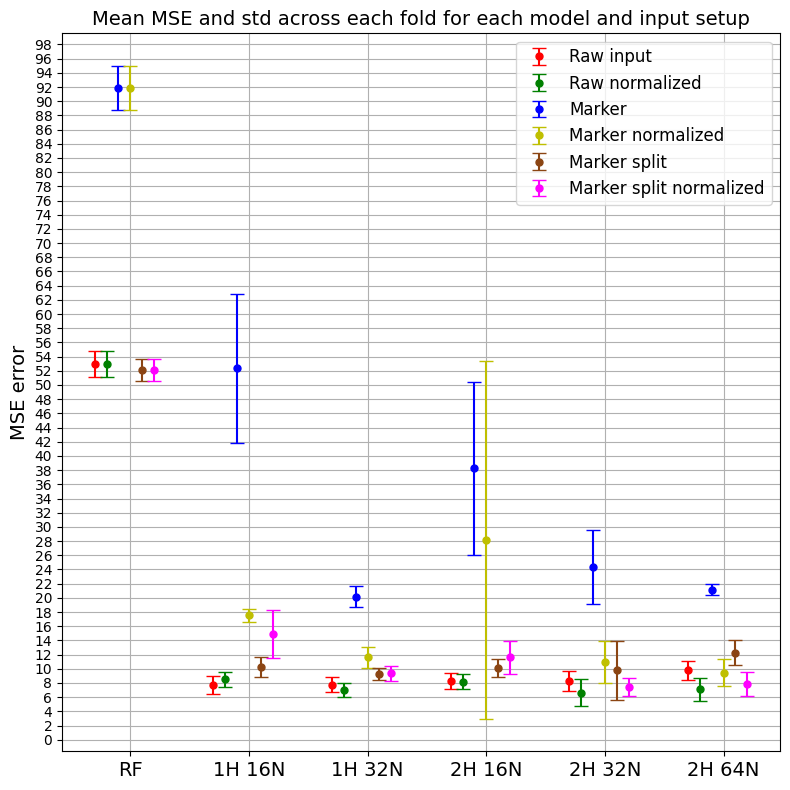

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

MSE_mean = [[1,2,3,4],[2,3,4,5],[2,3,4,5],[2,3,4,5],[2,3,4,5],[2,3,4,5]]
MSE_std = [[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1]]
labels = ["Raw input","Raw normalized", "Marker", "Marker normalized", "Marker split", "Marker split normalized"]

# Define feature labels
#feature_labels = ['2H 16N', '2H 32N', '3H 16N', '3H 32N', "3H 64N"]
feature_labels = ["RF",'1H 16N', '1H 32N', '2H 16N', '2H 32N', "2H 64N"]
epochs = []

kfold_mean = [52.962,52.962,91.867,91.867,52.144,52.144]
kfold_std = [1.833,1.833,3.102,3.102,1.576,1.576]

types = ["2hid_16_neu_" ,"2hid_32_neu_" ,    "3hid_16_neu_" ,    "3hid_32_neu_", "3hid_64_neu_" ]

# Plotting
fig, ax = plt.subplots(figsize=(8,8))
color = ["r","g","b","y","saddlebrown", "magenta"]
x = np.arange(0,24,4)
print("len x",len(x),x.shape,x)
lengths = 6
for i in range(lengths): 
    #else:
    val_mean = [kfold_mean[i],model_types[types[0]][i][0],model_types[types[1]][i][0],model_types[types[2]][i][0],model_types[types[3]][i][0],model_types[types[4]][i][0]]
    val_std = [kfold_std[i],model_types[types[0]][i][1],model_types[types[1]][i][1],model_types[types[2]][i][1],model_types[types[3]][i][1],model_types[types[4]][i][1]]
    #if i == 0:
    print(i)
    print(val_mean)
    print(val_std)
    # for j in range(4): 
    #     if j == 0:
    #         plt.errorbar(x+offset, MSE_mean[i], yerr=MSE_std[i], fmt='o',  markersize = 5, capsize=5, color = color[i],label = labels[i])
        #else:
    offset = (i - lengths/2) * 0.4
    plt.errorbar(x+offset, val_mean, yerr=val_std, fmt='o',  markersize = 5, capsize=5, color = color[i],label = labels[i])

ax.yaxis.set_major_locator(MultipleLocator(2))


# for j in range(4):
#     ms = 
#     val_mean = [model_types[types[j]][0],model_types[types[j]][1]]
#     for i in range(6):
  
#         offset = (i - len(MSE_mean)/2) * 0.3
#         if j == 0:
#             plt.errorbar(x+offset, MSE_mean[i], yerr=MSE_std[i], fmt='o',  markersize = 5, capsize=5, color = color[i],label = labels[i])
#         else:
#             plt.errorbar(x+offset, MSE_mean[i], yerr=MSE_std[i], fmt='o',  markersize = 5, capsize=5, color = color[i])



# Set y-axis labels
ax.set_xticks(x)
ax.set_xticklabels(feature_labels,fontsize=14)

# Set x-axis label and limits
ax.set_ylabel('MSE error',fontsize=14)
#ax.set_xlim([-2,14])
#ax.set_ylim([-0.2,6.5])

# Set title and grid
ax.set_title('Mean MSE and std across each fold for each model and input setup',fontsize=14)
ax.grid(True)

plt.legend(loc="upper right",fontsize=12)#loc="upper left"
plt.tight_layout()
plt.show()

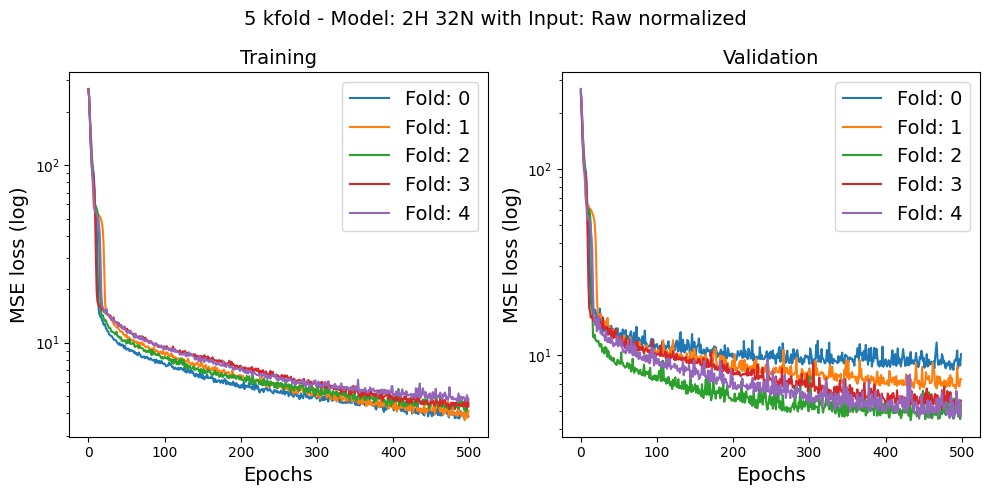

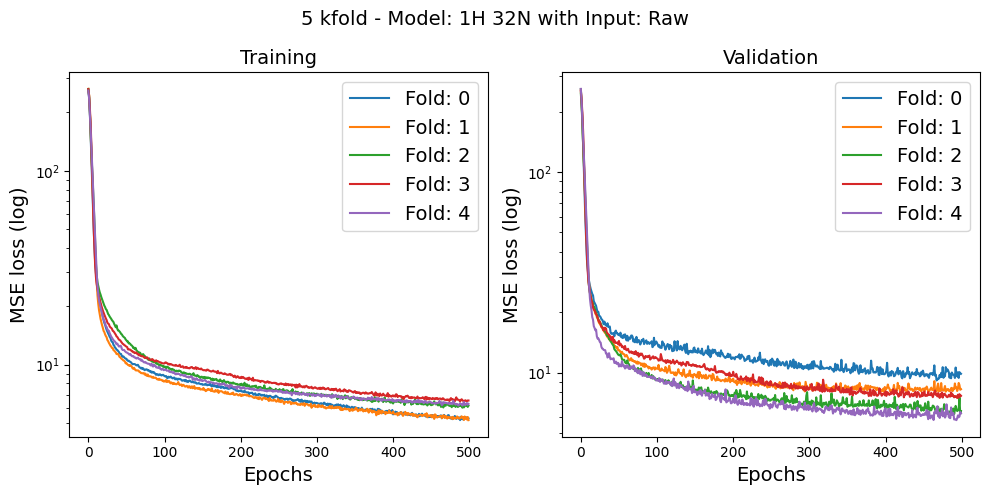

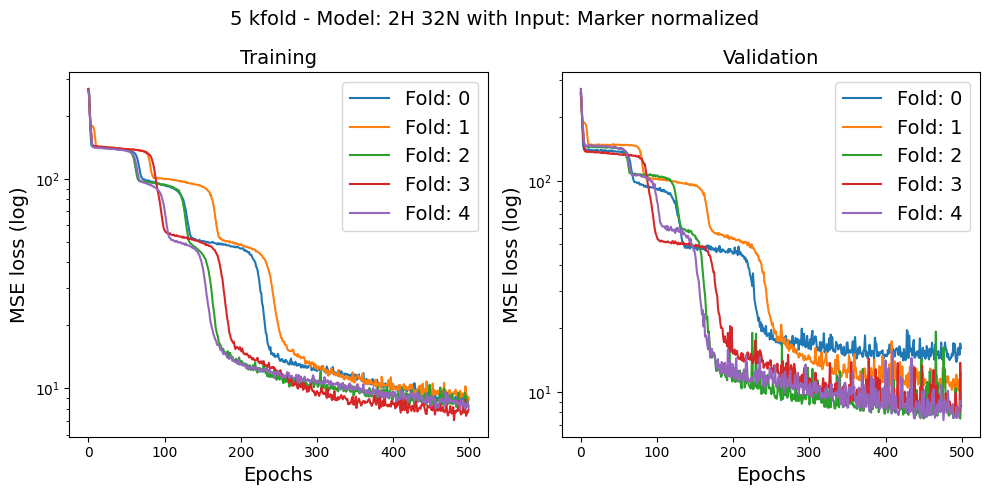

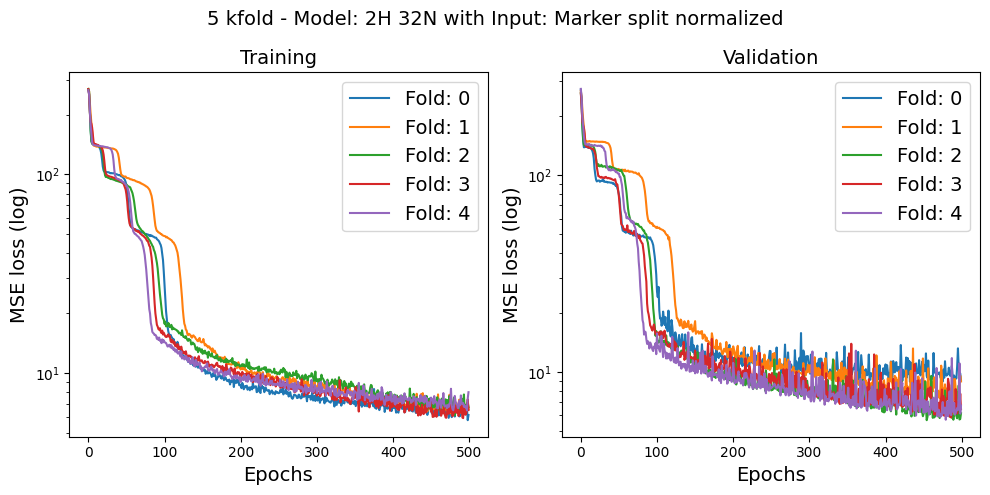

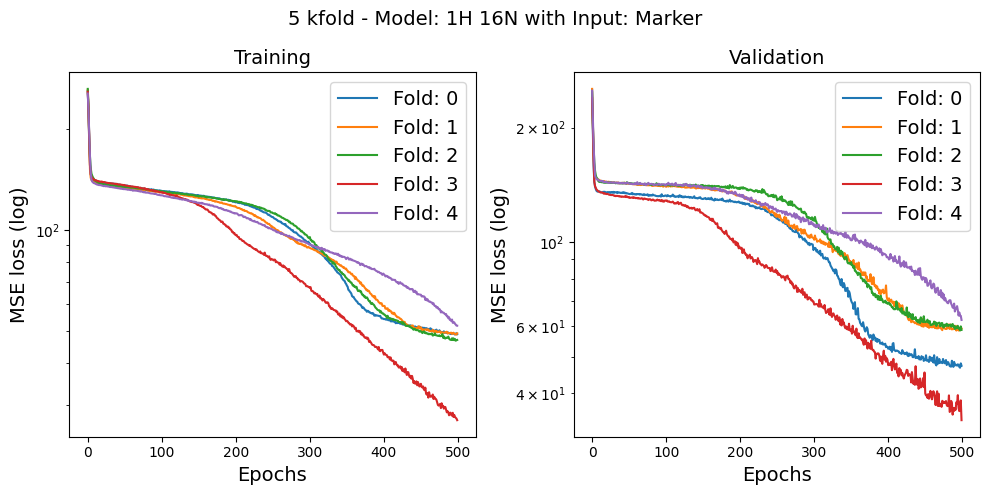

In [6]:
#Plot Training and validation loss for best/worst models
ts = [np.load("data/20_new/3hid_32_neu_500epoch_p001lr_norm-11_trainloss.npy"),
      np.load("data/20_new/2hid_16_neu_1000epoch_p001lr_nonorm_trainloss.npy"),
      np.load("data/20_new/3hid_32_neu_500epoch_p001lr_marker_2norm_nonplanar_trainloss.npy"),
      np.load("data/20_new/3hid_32_neu_500epoch_p001lr_marker_split_norm_nonplanar_trainloss.npy"),
      #np.load("data/20_new/3hid_16_neu_500epoch_p001lr_marker_nonorm_nonplanar_trainloss.npy"),
      np.load("data/20_new/2hid_16_neu_500epoch_p001lr_marker_nonorm_nonplanar_trainloss.npy")]
      #np.load("data/20_new/2hid_16_neu_500epoch_p001lr_marker_2norm_nonplanar_trainloss.npy")]



vs = [np.load("data/20_new/3hid_32_neu_500epoch_p001lr_norm-11_valloss.npy"),
      np.load("data/20_new/2hid_16_neu_1000epoch_p001lr_nonorm_valloss.npy"), 
      np.load("data/20_new/3hid_32_neu_500epoch_p001lr_marker_2norm_nonplanar_valloss.npy"),
      #np.load("data/20_new/3hid_16_neu_500epoch_p001lr_marker_nonorm_nonplanar_valloss.npy"),
      np.load("data/20_new/3hid_32_neu_500epoch_p001lr_marker_split_norm_nonplanar_valloss.npy"),
      np.load("data/20_new/2hid_16_neu_500epoch_p001lr_marker_nonorm_nonplanar_valloss.npy")]
      #np.load("data/20_new/2hid_16_neu_500epoch_p001lr_marker_2norm_nonplanar_valloss.npy")]

#versions = ["3hid_32","2hid_32","3hid_32","3H 16N","2H 16N"]
versions = ["2H 32N","1H 32N","2H 32N","2H 32N","1H 16N"]
names = ["Raw normalized","Raw","Marker normalized","Marker split normalized", "Marker"]




for j in range(len(ts)):
  plt.figure(figsize=(10,5))
  plt.suptitle(f"5 kfold - Model: {versions[j]} with Input: {names[j]}",fontsize=14)
  plt.subplot(1,2,1)
  plt.title("Training",fontsize=14)
  for i in range(5):
    plt.plot(ts[j][i][:500], label = f"Fold: {i}")
  plt.legend(fontsize=14)
  plt.xlabel("Epochs",fontsize=14)
  plt.ylabel("MSE loss (log)",fontsize=14)
  plt.yscale("log")
  plt.tight_layout()
  #plt.show()

  #plt.figure()
  plt.subplot(1,2,2)
  plt.title("Validation",fontsize=14)
  for i in range(5):
    plt.plot(vs[j][i][:500], label = f"Fold: {i}")
  plt.legend(fontsize=14)
  plt.xlabel("Epochs",fontsize=14)
  plt.ylabel("MSE loss (log)",fontsize=14)
  plt.yscale("log")
  plt.tight_layout()
  plt.show()

In [7]:
# Pretty print L2 loss to create a table

for i in range(5):
  print(vs[4][i][-1])

47.28715428998393
59.2298715652958
58.749256872361705
34.02013221863778
62.39911030184838
